In [1]:
from IPython.display import Image

# 회귀분석(Regression Analysis)

- 통계학에서 전통적으로 많이 사용되던 분석 방법으로, 관찰된 여러 데이터를 기반으로 각 연속형 변수 간의 관계를 모델링하고 이에 대한 적합도를 측정하는 분석 방법
    회귀분석으로 풀 수 있는 실생활 문제의 몇 가지 예시
    
    
    - 부모의 키와 자식의 키 사이의 관계
    
    
    - 자동차의 스펙을 이용한 가격 예측
    
    
    - 1인당 국민 총소득과 배기가스 배출량 사이의 관계 예측
    
    
    위에서 제시된 문제들은 모두 독립변수(independent variable)와 종속변수(dependent variable) 사이의 상호 관련성을 규명하는 것들입니다. 독립변수와 종속변수는 각각 설명변수(explanatory variable), 반응변수(response variable)라고 불리기도 합니다.
    
    
    
이러한 문제를 처음으로 파고들어, 회귀(Regression)라는 개념을 처음 제시한 사람은 영국의 우생학자 F. Galton(1822~1911)라고 합니다.

아래 그림1) 은 당시 Galton이 분석하였던 아버지의 키와 자식의 키 사이의 관계에 대한 원본 데이터와, 이를 토대로 그려본 직선 형태의 함수 관계도입니다.





그림1)
![title](https://d3s0tskafalll9.cloudfront.net/media/images/F-45-galton.max-800x600.png)

선형 회귀분석을 통해 좋은 모델을 만들기 위해서는 분석 데이터가 아래 4가지 기본가정을 만족해야 한다.

아래 4가지 기본가정을 만족하지 않으면 제대로 된 선형 회귀모델이 생성될 수 없다.


(1) 선형성

(2) 독립성

(3) 등분산성

(4) 정규성



그동안 공부해 왔던 머신러닝은 대부분 데이터 XX에 대한 정답 yy가 주어지는 지도학습이었습니다. 
지도학습은 크게 분류(classification)와 회귀(regression) 문제로 나뉩니다.

- 분류 : 데이터 xx의 여러 feature 값들을 이용하여 해당 데이터의 클래스 yy를 추론하는 것


- 회귀 : 데이터 xx의 여러 feature 값들을 이용하여 연관된 다른 데이터 yy의 정확한 값을 추론하는 것

# 선형 회귀 분석(Linear Regression)

### 선형 회귀(linear regression)는 이름에서 알 수 있듯이, 종속변수 Y와 한 개 이상의 독립변수 X와의 선형 상관관계를 모델링하는 회귀분석 기법입니다. 


여기서 독립변수의 개수에 따라 한 개의 독립변수를 가지고 있는 방식은 단순 선형회귀, 둘 이상의 독립변수를 가지고 있는 경우에는 다중 선형회귀라고 부르게 됩니다.

#### 선형 회귀 모델링
선형회귀식은 다음과 같습니다.
                                
                                
                                 y=βx+ϵ
                                
여기서 \betaβ는 회귀계수라고 불리며, \epsilonϵ는 종속 변수와 독립 변수 사이에 오차를 의미해요. 이들은 우리가 데이터로부터 추정해야 하는 파라미터가 됩니다. 결국 우리는 xx와 yy에 해당하는 데이터가 있을 때, 이러한 데이터로부터 \betaβ와 \epsilonϵ를 추정한 후 추정한 값들을 바탕으로 모델링을 수행해요. 그다음 해당 모델을 기반으로 새로운 데이터의 xx값들을 입력으로 넣어주었을 때, 그에 해당하는 yy 값을 추론하게 되는 것이죠. 그렇다면 결국 선형회귀 모델을 찾는다는 것은 쉽게 말하면, 주어진 데이터에 우리의 선형 식이 잘 맞도록 회귀계수 및 오차를 구하는 것 을 의미합니다.

## 잔차(Residuals)

우리가 회귀모델을 이용해 추정한 값과 실제 데이터의 차이를 의미합니다.



만일 사용자가 (2,8) 이라는 데이터를 가지고 있고, 선형 회귀모델의 식이 y=2x+3y=2x+3이라고 가정한다면, 해당 데이터에 대한 잔차 값은 8(실제 데이터의 y값) - 7(실제 데이터의 x값을 모델에 대입했을 때의 추론된 y값) = 1이 되는 겁니다.
그리고 최소제곱법은 이 잔차를 이용하여 주어진 점 데이터들을 가장 잘 설명하는 회귀모델을 찾는 가장 대표적인 방법 중 하나입니다.

###  데이터셋 준비하기(Boston house prices dataset)


- 데이터셋은 scikit-learn 라이브러리에서 기본으로 제공하는 Boston house prices dataset을 활용할 겁니다.


그럼 다음 파이썬 코드를 통해 해당 데이터셋을 어떻게 불러오고, 데이터셋에 대한 정보를 확인하는 방법은 무엇인지 한 번 알아보겠습니다.

In [3]:
from sklearn.datasets import load_boston
from sklearn import model_selection
import pandas as pd
import numpy as np

# 데이터 로드
boston = load_boston()
data, price = boston['data'], boston['target']
x_train, x_test, y_train, y_test = model_selection.train_test_split(data, price, test_size=0.2)

df = pd.DataFrame(x_train, columns=boston['feature_names'])
print("boston dataset의 차원: ", data.shape)
print("price의 차원", price.shape)
print("boston train dataset의 차원: ", x_train.shape)
print("boston test dataset의 차원: ", x_test.shape)

print("Boston dataset의 예시")
df.head() # data 요약

boston dataset의 차원:  (506, 13)
price의 차원 (506,)
boston train dataset의 차원:  (404, 13)
boston test dataset의 차원:  (102, 13)
Boston dataset의 예시


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.44178,0.0,6.20,0.0,0.504,6.552,21.4,3.3751,8.0,307.0,17.4,380.34,3.76
1,0.14932,25.0,5.13,0.0,0.453,5.741,66.2,7.2254,8.0,284.0,19.7,395.11,13.15
2,1.12658,0.0,19.58,1.0,0.871,5.012,88.0,1.6102,5.0,403.0,14.7,343.28,12.12
3,0.31533,0.0,6.20,0.0,0.504,8.266,78.3,2.8944,8.0,307.0,17.4,385.05,4.14
4,37.66190,0.0,18.10,0.0,0.679,6.202,78.7,1.8629,24.0,666.0,20.2,18.82,14.52


- Boston dataset은 총 506 row, 13가지의 attribute로 구성되어 있군요. 그리고 각 row에 대응되는 가격(price)의 값이 price에 저장되어 있어요. 데이터의 각 attribute가 의미하는 바가 무엇인지 궁금하시다면, print(boston["DESCR"])를 수행함으로써 각 attribute에 대한 설명을 확인할 수 있습니다.

In [4]:
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Boston Dataset에 Linear Regression 적용해보기

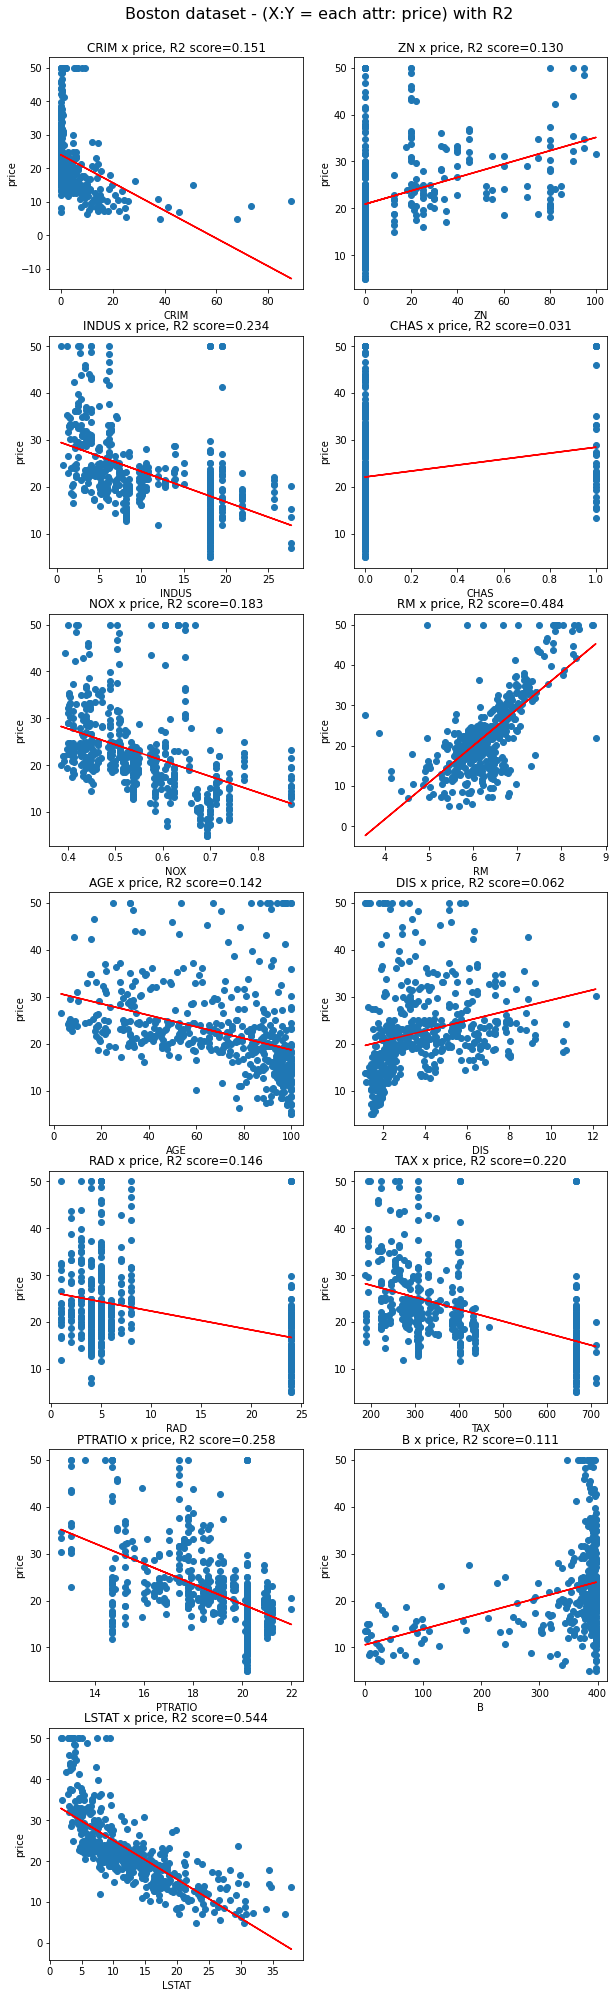

In [5]:
# Boston dataset의 각 attribute에 선형회귀 적용하는 예제
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import datasets
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,35))
fig.suptitle('Boston dataset - (X:Y = each attr: price) with R2', fontsize=16, y=0.9)

for i in range(data.shape[1]): # boston dataset에서 i번째 attribute(column)을 살펴볼 거에요.

    single_attr, attr_name = data[:, i].reshape(-1, 1), boston['feature_names'][i] # i번째 attribute에 대한 data 및 이름
    estimator = LinearRegression() # 선형 회귀 모델이에요.

    #x에는 single_attr, y에는 price에 해당하는 데이터를 대입해서 최소제곱법을 이용하여 모델 내에서 W, b를 구하는 과정이에요
    estimator.fit(single_attr, price) 

    #위 fit() 과정을 통해 구한 회귀계수를 기반으로 회귀모델에 X값을 대입했을 때의 예측 Y 값이에요. 
    pred_price = estimator.predict(single_attr)

    score = metrics.r2_score(price, pred_price) # 결정계수를 구하는 함수에요. 

    # 캔버스 생성
    ax = fig.add_subplot(7, 2, i+1)
    ax.scatter(single_attr, price) # 실제 데이터에 대한 산포도
    ax.plot(single_attr, pred_price, color='red') # 선형회귀모델의 추세선
    ax.set_title("{} x price, R2 score={:.3f}".format(attr_name ,score)) #subplot의 제목이에요
    ax.set_xlabel(attr_name) # x축
    ax.set_ylabel('price') # y축

위 그래프에서 보았듯이, R2 score 가 높은 편에 속하는 LSTAT(R2=0.544)와 RM(R2=0.484)를 이용하여 그린 선형회귀 모델이 그나마 데이터를 잘 설명 한다고 볼 수 있겠네요.
자세히 보시면, 두 데이터가 전반적으로 회귀선을따라서 잘 모여있는 것을 확인할 수 있습니다.

### 경사 하강법(Gradient Descent Algorithm)



적절한 회귀모델의 회귀계수를 찾기 위해서는 결국 손실함수를 잘 설정하는 것이 중요하겠죠. 주어진 데이터에 대하여 손실함수를 최소화하는 WW와 bb를 구하는 것이 결국 핵심이니까요. 그렇기 위해서는 손실함수의 형태가 주어진 데이터의 분포를 잘 반영하는 것이 중요하겠지만, 우리는 데이터의 분포가 어떠한지 항상 알 수 있는 것은 아니에요. 따라서 머신러닝에서는 가중치의 그래디언트(미분값)가 최소가 되는 지점이 손실함수를 최소로 하는 지점일 것이라는 가정을 하죠. 왜냐하면 보통 가중치 함수는 아래로 볼록한 형태이기 때문이에요. 아래 그림을 한번 살펴볼까요?

![title](https://d3s0tskafalll9.cloudfront.net/media/images/F-45-1.max-800x600.png)

출처 : https://lsh424.tistory.com/9

## 로지스틱 회귀분석(Logistic Regression)

- 로지스틱 회귀분석(Logistic Regression) 이란 데이터가 어떤 범주에 속할 확률을 0에서 1 사이의 값으로 예측하고 그 확률에 따라 가능성이 더 높은 범주에 속하는 것으로 분류해 주는 지도 학습 알고리즘입니다.

쉽게 말하면, 선형회귀분석과 비슷한데Y값이 확률로 도어 있기 때문에 하한,상한이 [0, 1]사이로 정해져있습니다.

그리고 특정 threshold 값을 기준으로 삼아서 예측된 확률 값이 threshold이상인 것과 미만인 것으로 분류를 하는  식입니다.

즉 1개 이상의 독립변수가 있을 떄 이를 이용하여 데이터가 2개의 범주 중 하나에 속하도록 결정하는 이진분류(binary classification) 문제를 풀떄 로지스틱 회귀분석을 많이 사용 합니다.

![title](https://d3s0tskafalll9.cloudfront.net/media/images/F-45-sigmoid.max-800x600.png)

위 사진이 앞으로 머신러닝이나 딥러닝을 공부하며 많이 보게된 sigmoid function의 형태입니다.

결국 Log-odds 값을 구한 다음, 이를 sigmoid function에 넣어서 0에서 1 사이의 값으로 변환해 주는 것입니다.

이함수는 확률모델을 선형 회귀모델로 표현한 것이 아니라, 위 그래프에서 z - 0 인 지점을 중심으로 하여 두 범주 간 경계가 불명확해지는 x의 구간(0.3 < P < 0.7)을 최소화해 주기 때문에 분류모델의 분류성능을 매우 향상시켜 줍니다.

정리를 해보자면, 로지스틱 회귀에선 데이터가 특정 범주에 속할 확률을 예측하기 위해 아래와 같은 단계를 거치게 됩니다.

- 실제 데이터를 대입하여 Odds 및 회귀계수를 구한다.


- Log-odds를 계산한 후, 이를 sigmoid function의 입력으로 넣어서 특정 범주에 속할 확률 값을 계산한다.


- 설정한 threshold에 맞추어 설정값 이상이면 1, 이하면 0으로 이진 분류를 수행한다.

본 로지스틱 회귀분석 예제에서는 비지도학습 노드에서 사용하였던 유방암 데이터셋을 한번 더 사용할 겁니다.

로지스틱 회귀분석으로 접근하기 가장 적합한 이진 분류이기 때문입니다..

In [8]:
# 로지스틱 회귀분석 예제: 유방암 데이터셋
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 데이터 로드
cancer=load_breast_cancer()

# y = 0(Malignant - 악성 종양), y=1(Benign - 양성 종양)
cancer_X, cancer_y= cancer.data, cancer['target']
train_X, test_X, train_y, test_y = train_test_split(cancer_X, cancer_y, test_size=0.1, random_state=10) # train 데이터셋과 test 데이터셋으로 나눔
print("전체 검사자 수: {}".format(len(cancer_X)))
print("Attribute 수: {}".format(len(cancer_X[0])))
print("Train dataset에 사용되는 검사자 수: {}".format(len(train_X)))
print("Test dataset에 사용되는 검사자 수: {}".format(len(test_X)))
cancer_df = pd.DataFrame(cancer_X, columns=cancer['feature_names'])
cancer_df.head()

전체 검사자 수: 569
Attribute 수: 30
Train dataset에 사용되는 검사자 수: 512
Test dataset에 사용되는 검사자 수: 57


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 로지스틱 회귀분석 예제


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

LR = LogisticRegression() #로지스틱 회귀분석
LR.fit(train_X, train_y) # 유방암 train data를 이용하여 로지스틱 회귀분석 모델 학습
pred = LR.predict(test_X) # 학습된 로지스틱 회귀분석 모델을 이용한 예측값 출력


# 로지스틱 회귀분석 모델의 예측값과 실제값 비교결과를 나타낸 통계표
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.97      0.94      0.96        36

    accuracy                           0.95        57
   macro avg       0.94      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57



C:\Users\qazxc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


scikit-learn에서 제공하는 LogisticRegression() 모듈을 이용하면 코드 몇 줄을 통해 log-odds 계산 등 많은 중간 단계를 생략하고 꽤 높은 Precision, Recall로 유방암 test data에 대한 분류를 수행할 수 있는 로지스틱 회귀모델을 학습할 수 있어요.

선형회귀와 로지스틱회귀를 보았을때 뭔가 이상하진 않았나요?

로지스틱 회귀는 과연 회귀모델일까? 아니면 분류 모델일까? 에 대한 의문이 없으셨나요?

이름은 회귀인데 조금 전까지 우리가 로지스틱 회귀를 이용해 풀어보았던 예제는 유방암 데이터셋을 이용한 이진 분류 문제였습니다.

사실 결론부터 말씀드리자면 로지스틱 회귀는 '회귀'모델이 맞습니다.

모델이 리턴하는 값이 연속적인 변수라는 점에서 로지스틱 회귀는 회귀모델의 정의에 부합합니다.

단지, 우리가 이전 선형회귀모델이 종속변수 y의 추정치 자체를 리턴하는 것에 비해, 로지스틱 회귀모델은 모델이 리턴하는 값이 바로 데이터 x가 어떤 범주에 속할 확률이라는 점이 독특할 뿐입니다.

하지만 확률 변수도 연속적인 변수인 건 마찬가지 입니다.


그렇다면 우리는 회귀모델인 로지스틱 회귀를 어떻게 분류 문제에 활용한 것일까요?

엄밀히 말하면 회귀모델로서의 로지스틱 회귀는 xx가 속할 범주별 확률 값을 계산하는 곳까지입니다

. 이후 argmaxargmax 등을 이용해 이 확률 값이 최대가 되는 범주를 골라 xx가 어떤 범주에 속하는지 예측하는 것은 로지스틱 회귀모델을 활용하는 응용 과정에 불과한 것입니다.

하지만 로지스틱 회귀는 그렇게 분류 문제를 확률적으로 접근하는 핵심 아이디어를 제공하므로 잘 알아두도록 합시다.

### Softmax 함수

위에서 이진 분류를 수행하는 로지스틱 회귀를 살펴보았습니다.

하지만 로지스틱 회귀는 이진 분류뿐 아니라 여러범주로 분류하는 다중 로지스틱 회귀(Multinomial Logistic Regression)으로 확장될 수 있습니다. 

이때, 위에서 다룬 시그모이드 함수는 다음과 같이 여러 범주로 분류하는 함수, 즉 softmax 함수로 확장되어야 합니다.

Softmax 함수는 2가지가 아닌 여러 범주로 분류하는 함수입니다. Multi class classification에 적합한 함수라고 볼 수 있죠.

#### Cross Entropy
Cross entropy 함수는 위에서 살펴보았던 softmax 함수의 손실함수로 쓰입니다.

지스틱 회귀에서는 종속변수 방향이 바로 확률변수 방향입니다.

그렇다면 이 손실함수를 선형회귀 때처럼 잔차의 제곱 형태로 측정하는 것이 타당할까요?

확률 0.4와 0.6 사이의 거리는 과연 0.8과 1.0 사이의 거리와 같다고 할 수 있을까요? 아니라면 어떤 방법이 더 적당할까요?

정확히 말씀드리자면 정보이론(Information Theory)을 빌린 설명이 필요합니다.

아주 개념적으로 말하자면 Cross Entropy는 로지스틱 회귀모델이 추론한 확률 분포 q(x)q(x)와 실제 데이터의 분포 p(x)p(x)의 차이를 계산한 것입니다. 이 차이가 적을수록 Cross entropy가 작아지게 됩니다.

아래 링크를 한번 참조해보시는게 더 나을 것 같습니다.



Cross Entropy를 쓰는 이유 : https://theeluwin.postype.com/post/6080524

Cross Entropy의 이해 : https://3months.tistory.com/436

### 유방암 데이터셋을 이용한 softmax 및 cross entropy 예제

 scikit-learn의 LogisticRegression을 이용해 다루어 보았던 유방암 데이터셋을 이용한 로지스틱 회귀를 Tensorflow API를 이용해 다시 구현해 보겠습니다.
 
다음 코드는 어떻게 보면 딥러닝의 첫걸음으로 나아가는 발판이 되는 코드이기도 합니다. 실제로 multi-class classification 문제를 풀 때 자주 사용하는 방법이니 예제 코드를 통해서 딥러닝과 조금 친해지는 계기가 되었으면 좋겠네요.

다만, 다음 코드는 AIFFEL에서 표준으로 사용하는 Tensorflow V2가 아닌 V1 기준으로 작성된 것입니다. 우리가 V2 코드에서 일반적으로 사용하는 model.fit() 함수를 사용해서 학습을 진행하면 실제로 gradient descent가 진행되는 과정을 보다 면밀히 관찰하기 어렵기 때문입니다. 물론 Tensorflow V2에서도 GradientTape를 사용하면 가능하지만, 이것은 다음에 나오는 노드에서 다시 배우도록 합시다.

- 아래 코드에 나오는 train_X, train_y, test_X, test_y 데이터는 이전 스텝에서 생성한 것을 그대로 사용합니다.

In [10]:
import tensorflow.compat.v1 as tf
import numpy as np
tf.compat.v1.disable_eager_execution()

x = tf.placeholder(tf.float32, [None, 30]) # 30개의 attribute를 가진 유방암 데이터셋
y = tf.placeholder(tf.float32, [None, 2]) # 악성, 양성 label에 one-hot encoding을 적용하여 2차원이 될 예정 
num_classes = 2 # 악성, 양성
lr = 0.0003 # learning rate

W = tf.Variable(tf.random_normal([30, num_classes]), name='weight') # 가중치
b = tf.Variable(tf.random_normal([num_classes]), name='bias') # bias

logits = tf.matmul(x, W) + b # log-odds에 해당되는 값
hypothesis = tf.nn.softmax(logits) # log-odds에 softmax 적용한 값

loss_i = tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=y) # i번째 변수의 p(x)*log(q(x))
loss = tf.reduce_mean(loss_i) # 이를 모두 summation한 최종 loss function

#최적화함수로 gradient descent method 사용
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(loss)

pred = tf.argmax(hypothesis, 1) # hypothesis의 결과 큰 값을 1, 작은 값을 0으로 매핑
correct_pred = tf.equal(pred, tf.argmax(y, 1)) # 예측값과 ground truth 값을 비교해서 같으면 True, 다르면 False
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32)) # True는 1, False는 0이 되기 때문에 전체 평균값이 결국 accuracy가 됩니다.


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # Tensorflow의 전역 변수 초기화
    one_hot_train_y = np.eye(num_classes)[train_y] # one-hot encoding을 수행한 train data 라벨
    one_hot_test_y = np.eye(num_classes)[test_y] # one-hot encoding을 수행한 test data 라벨
    
    # 전체 train data를 1000번 iteration
    for step in range(1000):
        sess.run(optimizer, feed_dict={x: train_X, y: one_hot_train_y}) # train data로 학습
        test_loss, test_acc= sess.run([loss, accuracy], feed_dict={x: test_X, y: one_hot_test_y}) #학습된 모델을 통해 측정한 test data의 loss 값 및 정확도
        if step % 10 == 0: # 10번째 step마다 print 수행
            print("Step {}, loss: {:.3f} accuracy: {:.3f}".format(
            step, 
            test_loss,
            test_acc
            ))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Step 0, loss: 983.275 accuracy: 0.632
Step 10, loss: 8.348 accuracy: 0.930
Step 20, loss: 8.233 accuracy: 0.930
Step 30, loss: 8.120 accuracy: 0.930
Step 40, loss: 8.009 accuracy: 0.930
Step 50, loss: 7.901 accuracy: 0.947
Step 60, loss: 7.793 accuracy: 0.947
Step 70, loss: 7.686 accuracy: 0.947
Step 80, loss: 7.577 accuracy: 0.947
Step 90, loss: 7.465 accuracy: 0.947
Step 100, loss: 7.353 accuracy: 0.947
Step 110, loss: 7.254 accuracy: 0.947
Step 120, loss: 7.163 accuracy: 0.947
Step 130, loss: 7.065 accuracy: 0.947
Step 140, loss: 6.957 accuracy: 0.947
Step 150, loss: 6.848 accuracy: 0.947
Step 160, loss: 6.739 accuracy: 0.947
Step 170, loss: 6.630 accuracy: 0.947
Step 180, loss: 6.518 accuracy: 0.947
Step 190, loss: 6.403 accuracy: 0.947
Step 200, loss: 6.287 accuracy: 0.947
Step 210, loss: 6.18

step을 거듭할수록 가중치와 편향이 최적화되어서 loss 값이 점점 줄고, 정확도 또한 높아지는 것을 확인할 수 있어요. 하지만 이를 위해서는 learning rate 등 하이퍼파라미터 사용에 주의해야 합니다.

Tensorflow V1에서는 with tf.Session() 위쪽에 있는 모델 선언부와 with tf.Session()문 안에 있는 실행부로 코드가 크게 나뉩니다. 그래서 모든 코드의 실제 수행은 sess.run() 안에서만 진행된다는 특징이 있습니다.

위 tensorflow_version1 코드를 version2로 바꿔 입력해 보겠습니다.

In [11]:
import tensorflow as tf
from tensorflow import keras

n_dense=30
n_train_epoch=20
num_classes = 2 # 악성, 양성

model=keras.models.Sequential()
model.add(keras.layers.Dense(num_classes, use_bias=True, activation='softmax', input_shape=(30,)))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(train_X, train_y, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(test_X, test_y, verbose=1)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 62        
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________
Train on 512 samples
Epoch 1/20
512/512 [==============================] - 0s 74us/sample - loss: 26.0733 - accuracy: 0.3711
Epoch 2/20
512/512 [==============================] - 0s 21us/sample - loss: 6.7269 - accuracy: 0.5156
Epoch 3/20
512/512 [==============================] - 0s 20us/sample - loss: 4.6727 - accuracy: 0.6211
Epoch 4/20
512/512 [==============================] - 0s 23us/sample - loss: 3.6044 - accuracy: 0.6348
Epoch 5/20
512/512 [==============================] - 0s 21us/sample - loss: 3.1624 - accuracy: 0.6602
Epoch 6/20
512/512 [==============================] - 0s 20us/sample - loss: 2.8592 - accuracy: 0.6660
Epoch 7/20
512

C:\Users\qazxc\anaconda3\lib\site-packages\keras\engine\training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


-  이 코드는 그동안 우리가 많이 사용했던 딥러닝 분류모델 코드와 매우 유사하다는 것을 알 수 있습니다.



In [12]:
import tensorflow as tf
from tensorflow import keras

n_dense=30
n_train_epoch=20
num_classes = 2 # 악성, 양성

model=keras.models.Sequential()

#레이어 3장을 추가
model.add(keras.layers.Dense(n_dense, input_shape=(30,), use_bias=True))
model.add(keras.layers.Dense(n_dense,  use_bias=True))
model.add(keras.layers.Dense(n_dense,  use_bias=True))

model.add(keras.layers.Dense(num_classes, use_bias=True, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(train_X, train_y, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(test_X, test_y, verbose=1)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_3 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 62        
Total params: 2,852
Trainable params: 2,852
Non-trainable params: 0
_________________________________________________________________
Train on 512 samples
Epoch 1/20
512/512 [==============================] - 0s 78us/sample - loss: 68.0659 - accuracy: 0.4668
Epoch 2/20
512/512 [==============================] - 0s 21us/sample - loss: 10.9892 - accuracy: 0.7148
Epoch 3/20
512/512 [=

In [13]:
model.summary ()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_3 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 62        
Total params: 2,852
Trainable params: 2,852
Non-trainable params: 0
_________________________________________________________________


번 유방암 데이터셋의 경우에는 512개밖에 되지 않은 작은 데이터셋이므로 레이어를 깊게 쌓는다고 해서 성능 향상에 크게 유리한 점은 아마 없을 것입니다. 아마 로지스틱 회귀만으로도 충분히 좋은 성능을 보여주는 것을 확인할 수 있을 것입니다.

하지만 여러분들이 회귀 모델의 원리를 통해서 어떻게 딥러닝으로 확률 모델을 구현하는 것이 분류 문제 해결에 사용되는지의 기본 원리를 파악하는 데에 도움이 되었기를 바랍니다.